In [36]:
import os

import tensorflow        as tf
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.image  as img

from sklearn.model_selection import train_test_split
from tensorflow              import keras

In [37]:
labels = []
images = []
training_images_dir = '..\\resources\\training_images\\'
for _, _, files in os.walk(training_images_dir, topdown=True):
    for file in files:
        labels.append(int(file[0]))
        images.append(img.imread(os.path.join(training_images_dir + file[0] + '\\', file))[:,:,:1])


In [38]:
labels = np.asarray(labels)
images = np.asarray(images)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33)

(6733, 200, 200, 1)
(3317, 200, 200, 1)
(6733,)
(3317,)
5


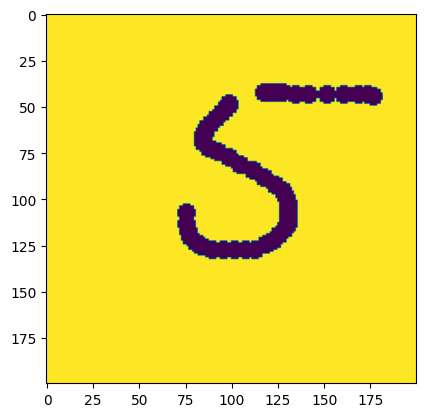

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[10])
plt.imshow(X_train[10])

In [41]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))


In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 197, 197, 32)      544       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 135424)           

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [44]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
model.save('..\\model')

Epoch 1/10
211/211 [==============================] - 7s 32ms/step - loss: 1.8802 - accuracy: 0.3412 - val_loss: 1.3263 - val_accuracy: 0.5469
Epoch 2/10
211/211 [==============================] - 6s 30ms/step - loss: 0.7770 - accuracy: 0.7551 - val_loss: 0.8680 - val_accuracy: 0.7350
Epoch 3/10
211/211 [==============================] - 6s 28ms/step - loss: 0.2044 - accuracy: 0.9391 - val_loss: 1.0504 - val_accuracy: 0.7257
Epoch 4/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0680 - accuracy: 0.9805 - val_loss: 1.2268 - val_accuracy: 0.7106
Epoch 5/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0316 - accuracy: 0.9920 - val_loss: 1.2659 - val_accuracy: 0.7440
Epoch 6/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 1.2869 - val_accuracy: 0.7440
Epoch 7/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 1.5400 - val_accuracy: 0.7486

INFO:tensorflow:Assets written to: ..\model\assets


INFO:tensorflow:Assets written to: ..\model\assets


104/104 - 1s - loss: 1.7375 - accuracy: 0.7272 - 801ms/epoch - 8ms/step


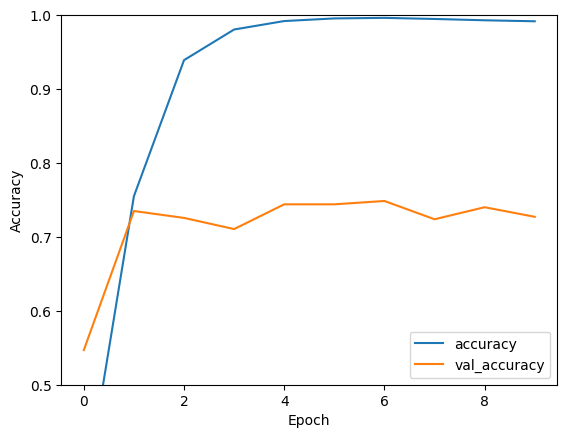

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)